In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [3]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))



3198
3198
3198


In [4]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))


In [5]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

In [6]:
print(returns_mat)

[[  0.63191153   1.88216039  12.43869817]
 [  0.22566719 -11.24497992 -19.23076923]
 [ -1.90895742  18.37104072  32.3024055 ]
 ...
 [ -2.41629595   4.63576159  -0.11389522]
 [  0.26872691  -0.43816943  -0.40723245]
 [ -0.35893754  -0.4400978   -0.31076219]]


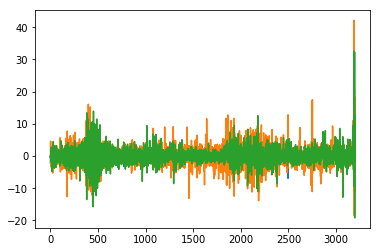

In [7]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

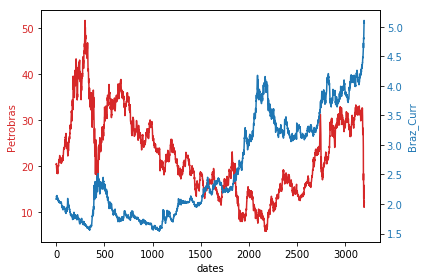

In [8]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

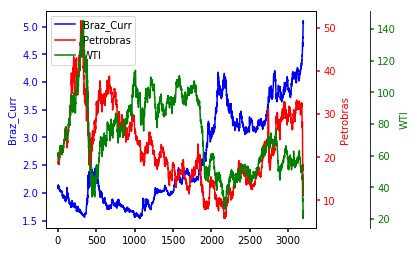

In [9]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data[:,0], "b-", label="Braz_Curr")
p2, = par1.plot(data[:,1], "r-", label="Petrobras")
p3, = par2.plot(data[:,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [30]:
lam = 0
max_iter = 300
N_states = 3

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=50,
                         n_jobs=-1)
mdl.fit(returns_mat)

HMM_GraphicalLasso(alpha=0, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=4, n_jobs=-1, repetitions=50, tol=0.0001,
                   verbose=False, warm_restart=True)

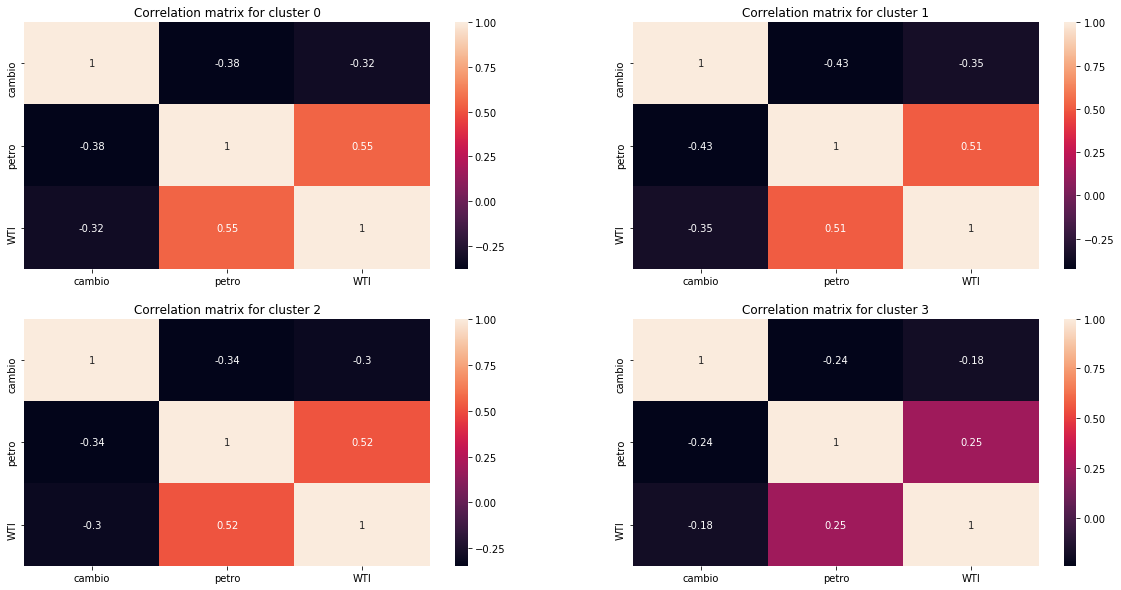

In [34]:
corr_plot(mdl.covariances_,labels=["cambio","petro","WTI"],covcorr = True)

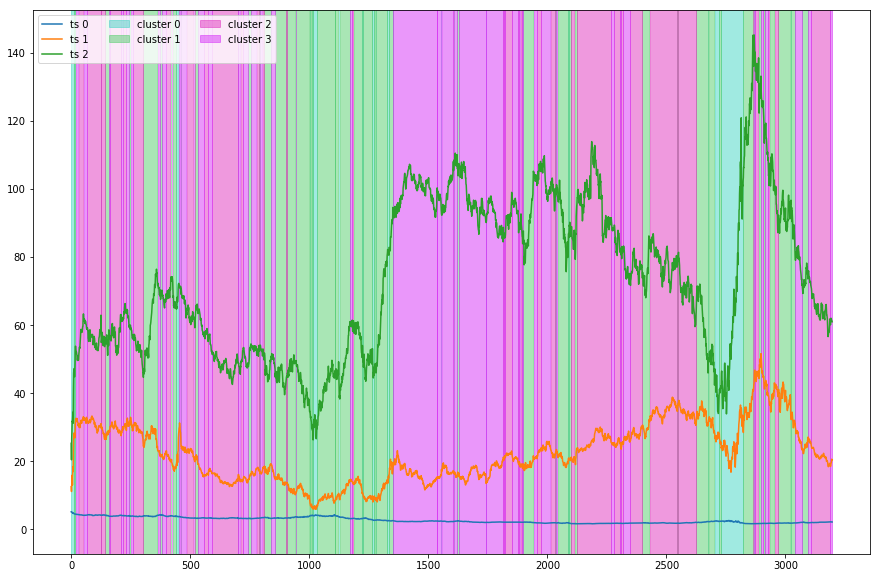

In [33]:
plot_results_cluster(data, mdl.labels_)

In [ ]:
from regain.hmm.utils_portfolio_optimization import PO_with_HMM_GMM
N_backtest = 1000
Invest_wealth = 1e5


PLpred,PLtod,PLemp = PO_with_HMM_GMM(returns_mat,
                                     data[1:,:],
                                     np.linspace(0,50,3),
                                     [2,3],
                                     N_max_mem = 1500,
                                     N_test=N_backtest,
                                     Wealth=Invest_wealth,
                                     mu_p= 0.1,
                                     OP_method = 'Min_Var_Fix_return',
                                     leverage=True)

100%|██████████| 3/3 [28:55<00:00, 578.65s/it]


Pred changed cluster
Today changed cluster
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[2.93017811 1.         1.34292904] [-0.12885707  0.24695931  0.24353181] [-0.37757418  0.24695931  0.32704594]
[4.22156328 1.         1.124932  ] [ 0.05810374 -0.09063534 -0.05352282] [ 0.24528863 -0.09063534 -0.06020953]
Price difference -0.02740000000000009 N purchased pred 8074.0 N purchased today 8074.0 N purchased emp 14423.0
Price difference -0.25 N purchased pred 1504.0 N purchased today 1504.0 N purchased emp 2171.0
Price difference -1.3999999999999986 N purchased pred 1443.0 N purchased today 1443.0 N purchased emp 636.0
P&L predict [-2617.4276]
P&L today [-2617.4276]
P&L emp [-1828.3402]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[2.9297928  1.         1.34113937] [-0.12723442  0.25226362  0.25180797] [-0.3727705   0.25226362  0.33770958]
[4.42563403 1.     